## Customer Spending Clustering with DBSCAN

In [48]:
"""
Customer Spending Clustering with DBSCAN

This notebook explores unsupervised clustering of wholesale customer purchase data
using DBSCAN (Density-Based Spatial Clustering). It includes exploratory data analysis,
feature scaling, model fitting across varying epsilon values, outlier detection,
and cluster interpretation through visualizations and heatmaps.

Dataset: Wholesale customers dataset (public sample).
Author: Gabe McWilliams
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [49]:
# Dataset: "Wholesale customers data" (public sample set)
df = pd.read_csv('/mnt/ml/mnt/mls/data/udemy/udemy/wholesome_customers_data.csv')

In [50]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA


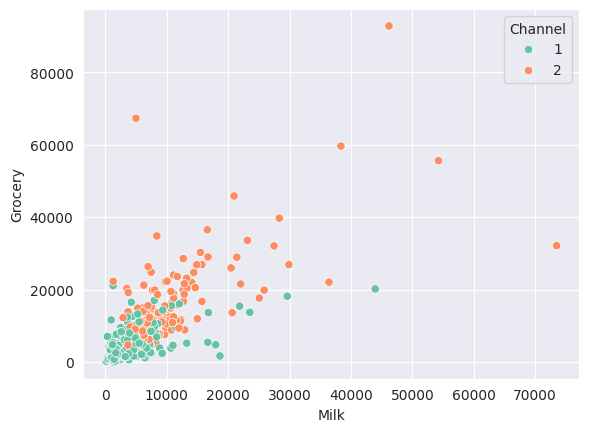

In [52]:
fig = sns.scatterplot(x='Milk', y='Grocery', hue='Channel', data=df, palette='Set2')

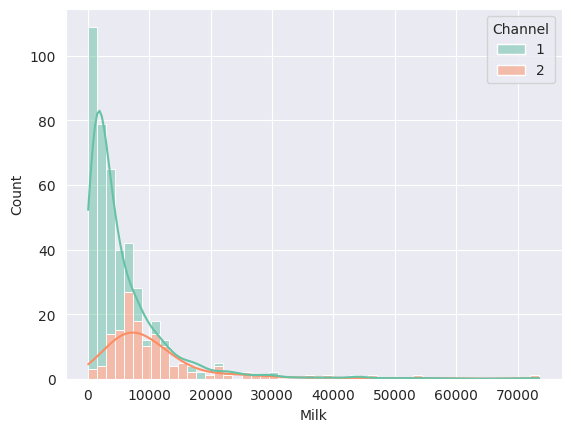

In [53]:
fig = sns.histplot(x='Milk', hue='Channel', data=df, multiple='stack', kde=True, palette='Set2')
plt.show()

In [54]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate, simila

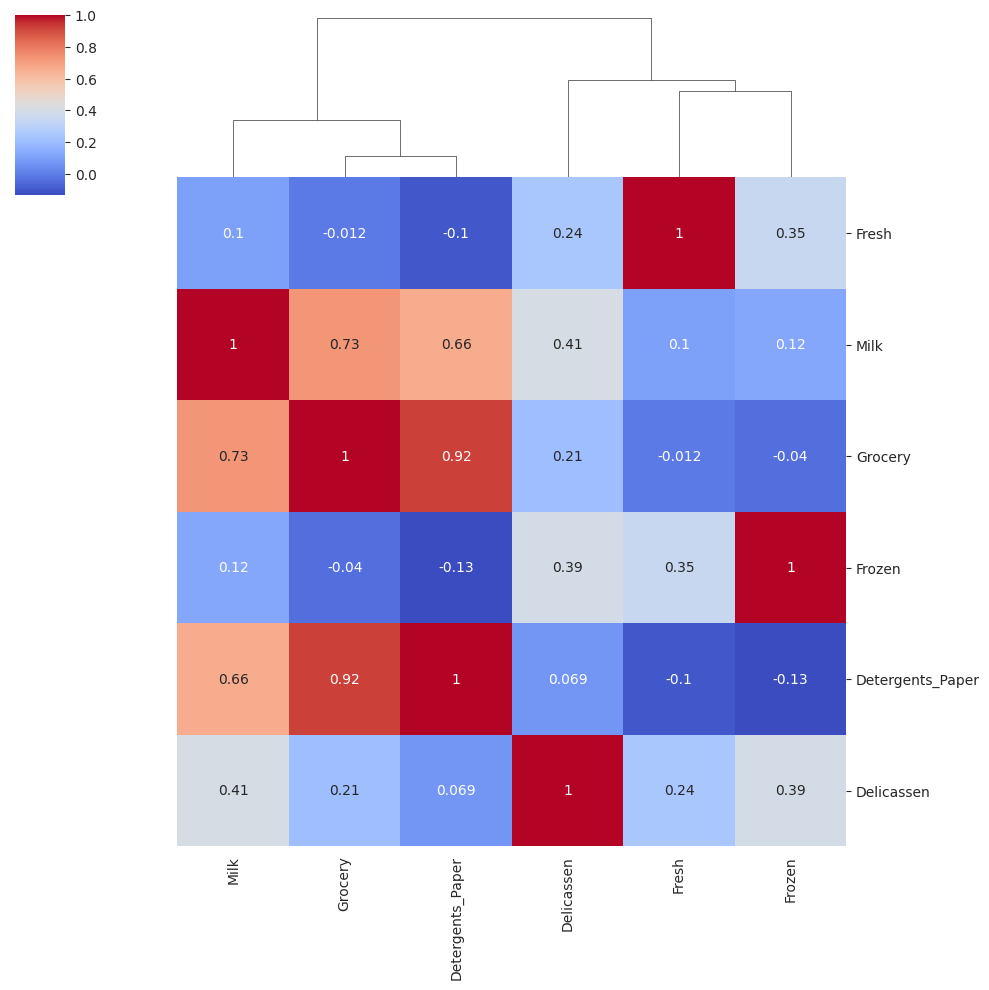

In [55]:
fig = sns.clustermap(df.drop(['Region','Channel'], axis=1).corr(), annot=True, cmap='coolwarm', row_cluster=False)
plt.show()

In [56]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


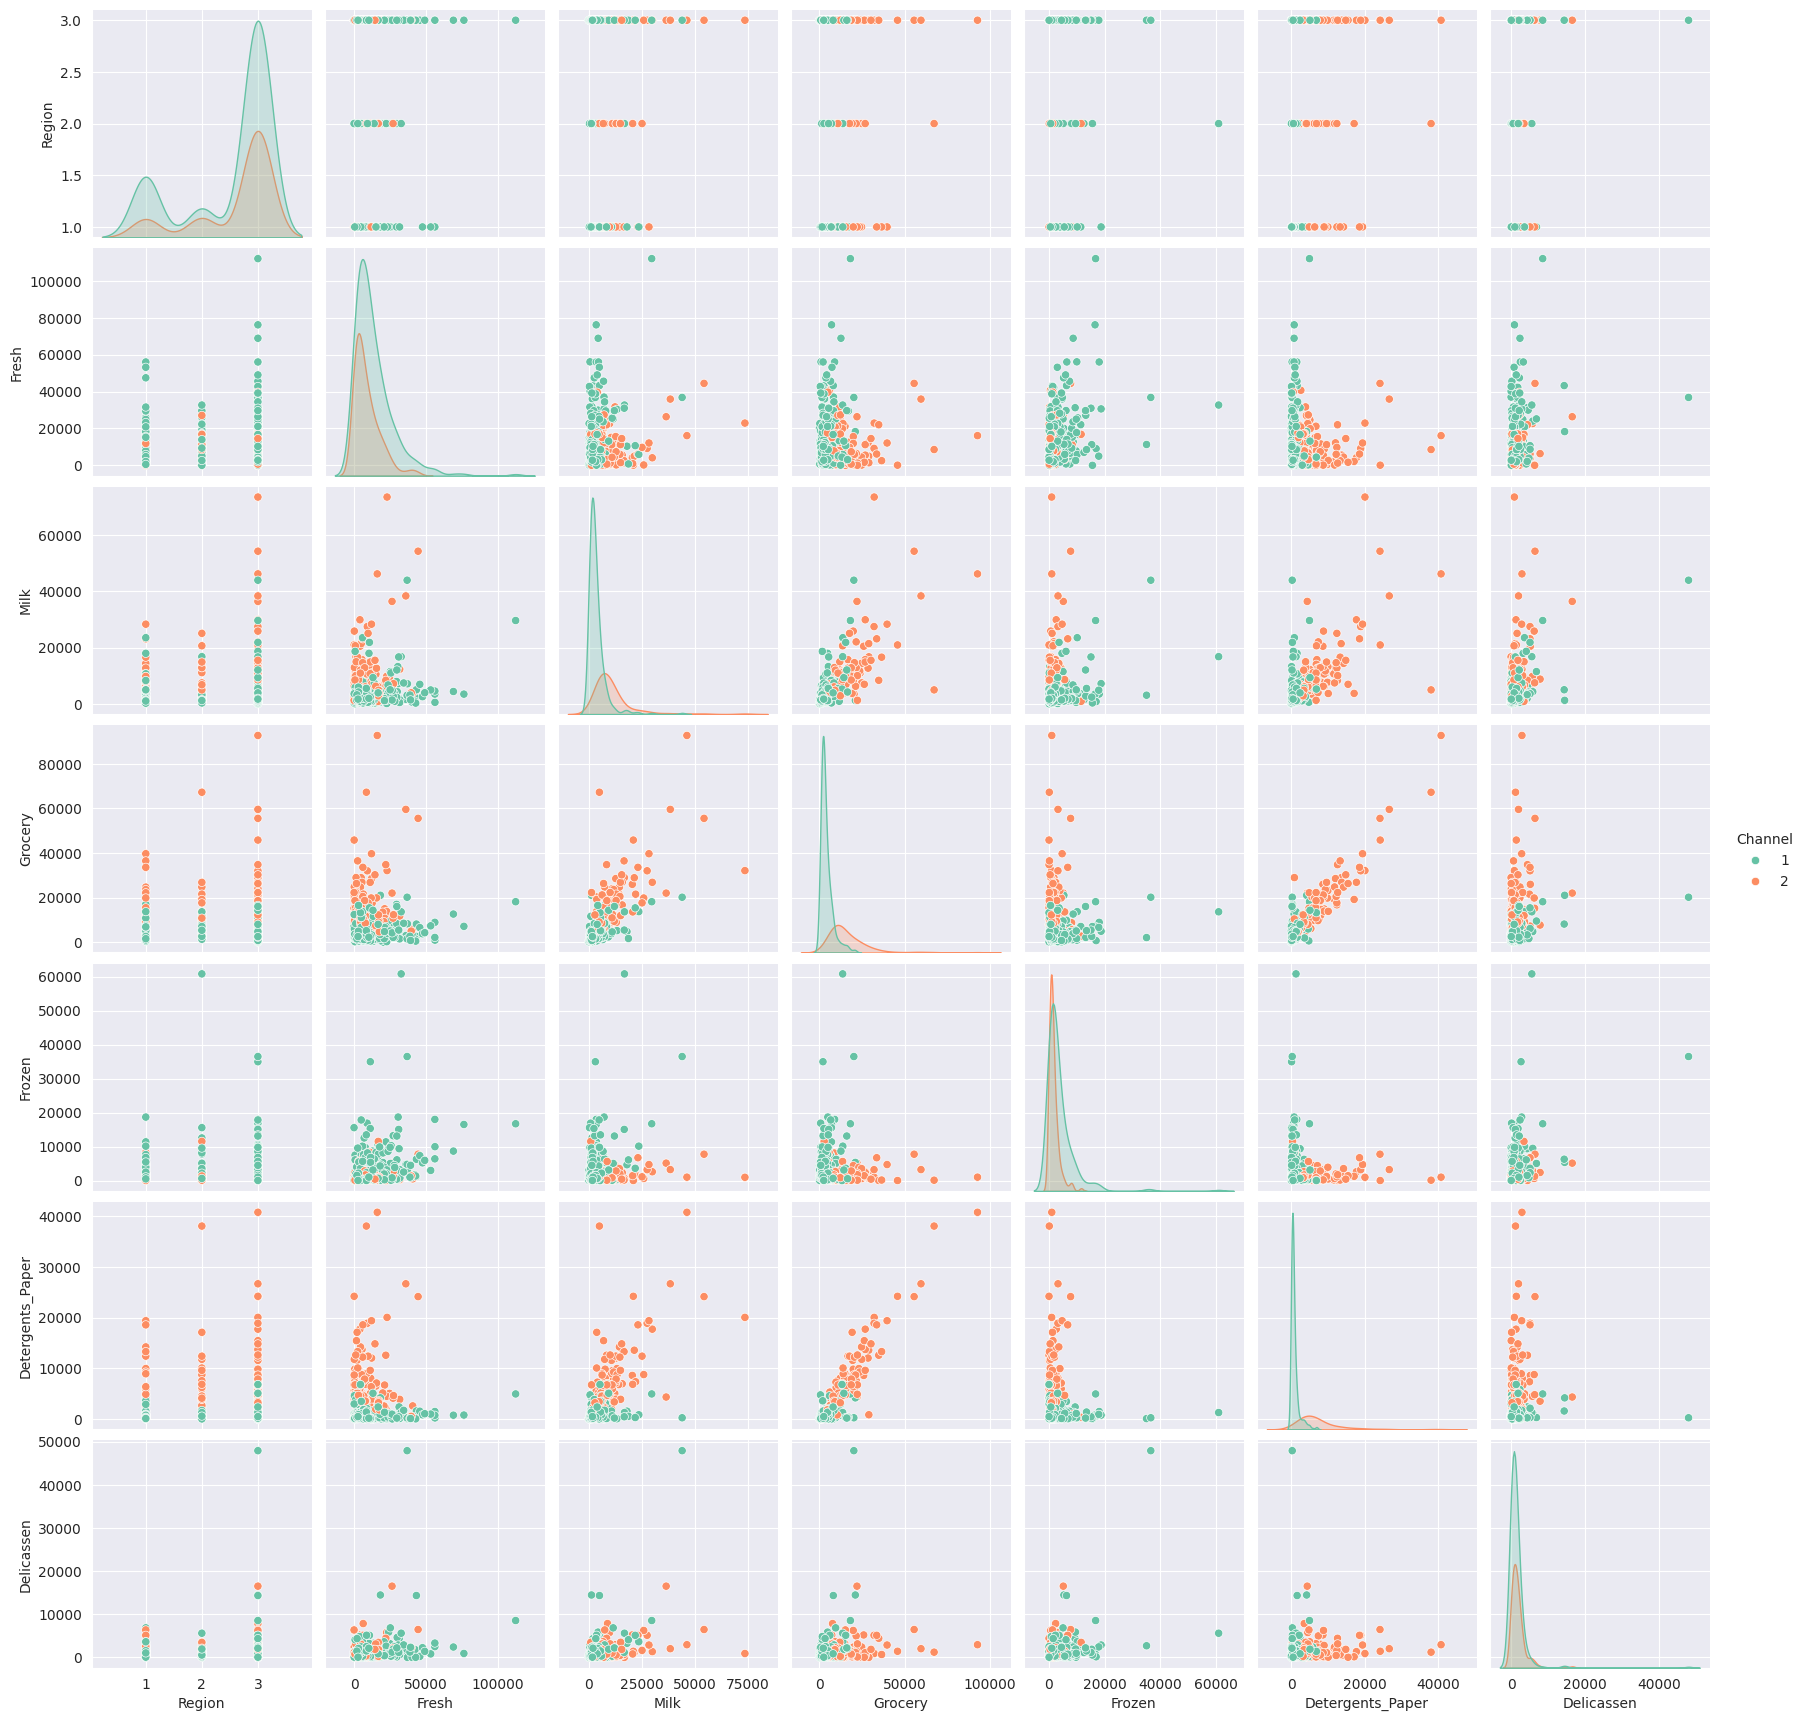

In [57]:
fig = sns.pairplot(df, hue='Channel', palette='Set2')
plt.show()

## DBSCAN


In [58]:
scaler = StandardScaler()

In [59]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [60]:
df_scaled = scaler.fit_transform(df)

In [61]:
df_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [62]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(x='X1', y='X2', hue=labels, data=data, palette='Set1')

In [63]:
def print_outlier_stats(num_of_iterations, data):
    info_list = []
    extend_line = 0
    first_zero_found = False
    for i in range(1, num_of_iterations):
        model = DBSCAN(eps=i / 100)
        labels = model.fit_predict(data)
        # print(f'Iteration {i}\n Percent of outliers {round((np.sum(labels == -1) / len(data)) * 100, 2):.2f}%\n Data points: {len(data)}')

        # Number of clusters (excluding noise points labeled as -1)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        info_list.append({
            'eps': i / 100,
            'percent_outliers': round((np.sum(labels == -1) / len(data)) * 100, 2),
            'data_points': len(data),
            'outliers': np.sum(labels == -1)
        })

        if np.sum(labels == -1) == 0:
            # Print the results
            if first_zero_found is False:
                print('-' * 80)
                print(f'No outliers found at eps={i + 1 / 100}')
                print(f'Iteration {i + 1}')
                print(f'Number of clusters: {num_clusters}')
                print(f'Percent of outliers {round((np.sum(labels == -1) / len(data)) * 100, 2):.2f}%')
                print(f'Data points: {len(data)}')
                print('-' * 80)

                first_zero_found = True

            extend_line = extend_line + 1
            if extend_line > 5:
                # Plot the final results as a scatter plot visualization
                sns.scatterplot(x='X1', y='X2', hue=labels, data=data, palette='nipy_spectral_r')
                plt.show()
                break

        elif i == num_of_iterations - 1:
            print('-' * 80)
            print(f'Unable to find a suitable epsilon after {num_of_iterations + 1} iterations')
            print(f'Iteration {i + 1}')
            print(f'Number of clusters: {num_clusters}')
            print(f'Percent of outliers {round((np.sum(labels == -1) / len(data)) * 100, 2):.2f}%')
            print(f'Data points: {len(data)}')
            print('-' * 80)


            # Plot the final results as a scatter plot visualization
            sns.scatterplot(
                x='X1',
                y='X2',
                hue=labels,
                data=data,
                palette='nipy_spectral_r')

            plt.show()
            break

    # Create a DataFrame to store the results
    df_outliers_info = pd.DataFrame(info_list)

    # Plot the percent of outliers against epsilon
    fig = sns.lineplot(x='eps', y='percent_outliers', data=df_outliers_info)
    fig.set_xlabel('Epsilon')
    fig.set_ylabel('Percent of Outliers (%)')

    try:
        # Find the first occurrence of percent_outliers == 0
        first_zero = df_outliers_info[df_outliers_info['percent_outliers'] == 0].iloc[0]  # Get first row only

        # Plot a red marker at the first zero without affecting the lineplot curve
        plt.scatter(
            first_zero['eps'],
            first_zero['percent_outliers'],
            color='red', zorder=3,
            label=f'No Outliers Found @ eps: {float(first_zero.iloc[0])}',
            marker='o',
            s=100)

        # Add horizontal and vertical lines at the first zero
        plt.axvline(x=first_zero['eps'], color='red', linestyle='--')
        plt.axhline(y=first_zero['percent_outliers'], color='red', linestyle='--')

        # Move legend below the graph at "lower center"
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
    except:
        pass

    plt.show()

In [64]:
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):

    model = DBSCAN(eps=eps, min_samples=2 * df_scaled.shape[1])
    model.fit(df_scaled)

    percent_outliers = round((np.sum(model.labels_ == -1) / len(df_scaled)) * 100, 2)

    outlier_percent.append(percent_outliers)

<Axes: >

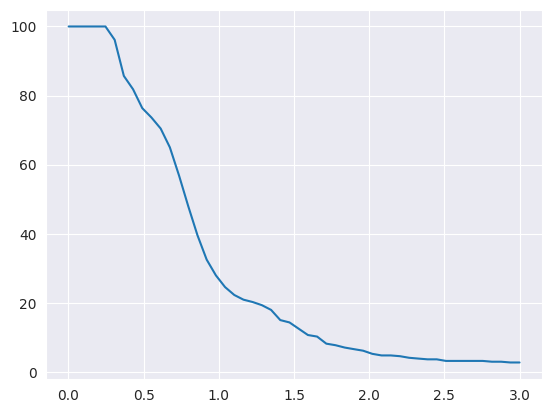

In [65]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_percent)

## DBSCAN with Chosen Epsilon


In [66]:
dbscan = DBSCAN(eps=2, min_samples=2 * df_scaled.shape[1]).fit(df_scaled)

In [67]:
dbscan.fit(df_scaled)

DBSCAN(eps=2, min_samples=16)

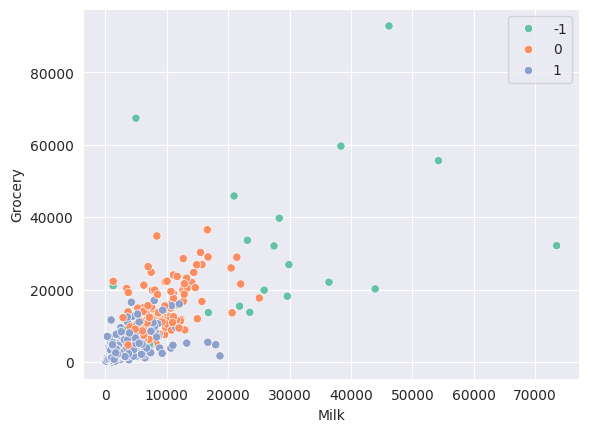

In [68]:
sns.scatterplot(x='Milk', y='Grocery', hue=dbscan.labels_, data=df, palette='Set2')
plt.show()

In [69]:
df['Labels'] = dbscan.labels_

In [70]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [71]:
cats = df.drop(['Region','Channel'], axis=1)
cat_means = cats.groupby('Labels').mean()

In [72]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


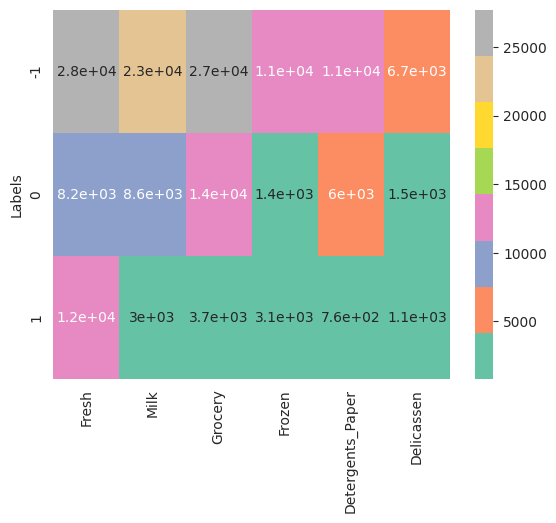

In [73]:
sns.heatmap(cat_means, annot=True, cmap='Set2')
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
scaled_cat_data = scaler.fit_transform(cat_means)
pd.DataFrame(scaled_cat_data, cat_means.index, columns=cat_means.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


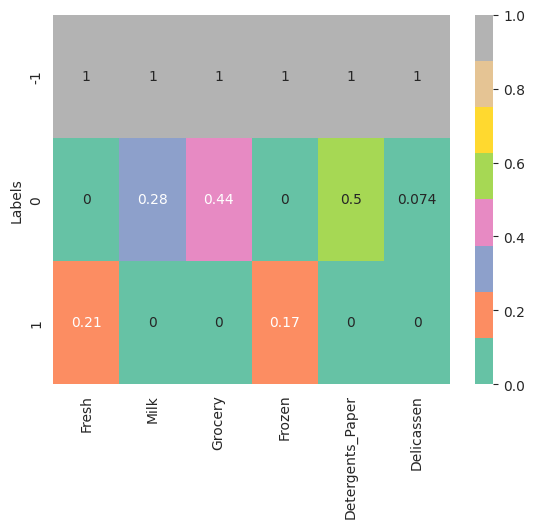

In [77]:
sns.heatmap(pd.DataFrame(scaled_cat_data, cat_means.index, columns=cat_means.columns), annot=True, cmap='Set2')
plt.show()